In [1]:
import sqlite3
import pandas as pd
import numpy as np

### Загрузка и предобработка данных

In [2]:
db_path = r"C:\Users\HAFF\Downloads\data\result_data\shop_database.db"
conn = sqlite3.connect(db_path)

In [3]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,purchases
1,personal_data_coeffs
2,personal_data


In [4]:
df_personal = pd.read_sql("SELECT * FROM personal_data", conn)
df_coeffs = pd.read_sql("SELECT * FROM personal_data_coeffs", conn)
df_purchases = pd.read_sql("SELECT * FROM purchases", conn)

In [5]:
df_personal = df_personal[df_personal['country'] == 32]

In [6]:
df_personal.head()

,id,gender,age,education,city,country
0,0,0,36,среднее,1201,32
1,4,0,35,среднее,1134,32
2,6,1,52,среднее,1188,32
3,7,0,37,среднее,1198,32
4,9,0,48,среднее,1134,32


In [7]:
df_coeffs.head()

,id,lbt_coef,ac_coef,sm_coef,personal_coef
0,0,5.078678,-0.307147,0.959027,0.5072
1,3,7.764766,-0.030225,0.794720,0.4304
2,4,4.569378,0.063693,0.820892,0.5072
3,6,8.150379,0.075200,0.836140,0.4304
4,7,5.188231,-0.000134,0.944113,0.5072


In [8]:
df_purchases.head()

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27


In [9]:
print(df_personal.isna().sum())
print(df_coeffs.isna().sum())
print(df_purchases.isna().sum())

id           0
gender       0
age          0
education    0
city         0
country      0
dtype: int64
id               0
lbt_coef         0
ac_coef          0
sm_coef          0
personal_coef    0
dtype: int64
id                  0
product             0
colour         119524
cost                0
product_sex    314712
base_sale           0
dt                  0
dtype: int64


In [10]:
print(df_personal.duplicated(keep=False).sum())
print(df_coeffs.duplicated(keep=False).sum())
print(df_purchases.duplicated(keep=False).sum())

0
0
0


In [11]:
df_purchases["product"] = (df_purchases["product"].str.strip().str.lower())
df_purchases["colour"] = (df_purchases["colour"].fillna("unknown").str.strip().str.lower().str.split("/").str[0])
df_purchases["product_sex"] = df_purchases["product_sex"].fillna("unknown")

In [12]:
print(df_purchases.isna().sum())

id             0
product        0
colour         0
cost           0
product_sex    0
base_sale      0
dt             0
dtype: int64


In [13]:
df_purchases.head()

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"велосипед горный женский stern mira 2.0 26""",белый,13599,0.0,1,7
1,0,стол outventure,зелёный,1499,unknown,0,37
2,0,набор outventure: стол + 4 стула,бежевый,4799,unknown,0,37
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,unknown,0,27


In [14]:
df_personal_lost = pd.read_csv(r"C:\Users\HAFF\Downloads\personal_data.csv")

In [15]:
df_personal_lost = df_personal_lost[df_personal_lost['country'] == 32]
df_personal_full = pd.concat([df_personal, df_personal_lost], ignore_index=True)

In [16]:
print(df_personal_full.duplicated(keep=False).sum())

0


In [17]:
df_personal_full.head()

,id,gender,age,education,city,country
0,0,0.0,36,среднее,1201,32
1,4,0.0,35,среднее,1134,32
2,6,1.0,52,среднее,1188,32
3,7,0.0,37,среднее,1198,32
4,9,0.0,48,среднее,1134,32


In [18]:
print(df_personal_full.isna().sum())

id               0
gender       15651
age              0
education        0
city             0
country          0
dtype: int64


In [19]:
df_model = df_personal_full.merge(df_coeffs, on='id', how='left')

agg_purchases = (df_purchases.groupby('id').agg({
        'cost': ['mean', 'sum', 'count'],
        'base_sale': 'mean'}))

agg_purchases.columns = ['cost_mean', 'cost_sum', 'purchases_count', 'sale_ratio']
agg_purchases = agg_purchases.reset_index()

df_model = df_model.merge(agg_purchases, on='id', how='left')

In [20]:
df_model.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,6632.333333,19897,3,0.333333
1,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,4441.857143,31093,7,0.000000
2,6,1.0,52,среднее,1188,32,8.150379,0.075200,0.836140,0.4304,5605.666667,84085,15,0.400000
3,7,0.0,37,среднее,1198,32,5.188231,-0.000134,0.944113,0.5072,4525.153846,58827,13,0.384615
4,9,0.0,48,среднее,1134,32,5.334059,-0.366793,1.223406,0.5072,6329.000000,63290,10,0.900000


In [21]:
print(df_model.isna().sum())

id                     0
gender             15651
age                    0
education              0
city                   0
country                0
lbt_coef               0
ac_coef                0
sm_coef                0
personal_coef          0
cost_mean              0
cost_sum               0
purchases_count        0
sale_ratio             0
dtype: int64


### Построение модели для восстановления пола. Классификация

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

In [37]:
def replace_inf(X):
    X = np.array(X, dtype=np.float64)  
    X[np.isinf(X)] = np.nan             
    return X

train_data = df_model.dropna(subset=['gender'])

X = train_data.drop(columns=['id', 'gender'])
y = train_data['gender']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

drop_features = ['lbt_coef', 'personal_coef']
numerical_features = [col for col in numerical_features if col not in drop_features]

In [38]:
num_pipeline = Pipeline(steps=[
    ("replace_inf", FunctionTransformer(replace_inf, validate=False)),
    ("imputer", SimpleImputer(strategy="median"))])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57      7494
         1.0       0.69      0.76      0.72     10264

    accuracy                           0.66     17758
   macro avg       0.65      0.64      0.65     17758
weighted avg       0.66      0.66      0.66     17758



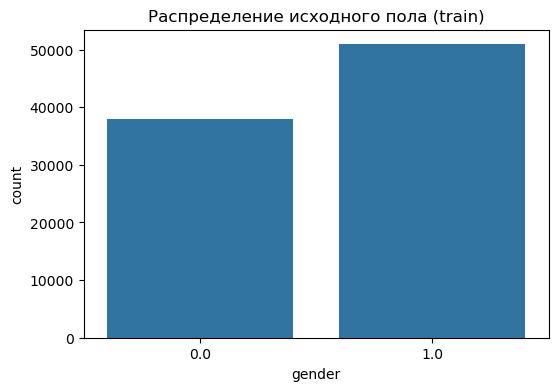

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Распределение исходного пола (train)")
plt.show()

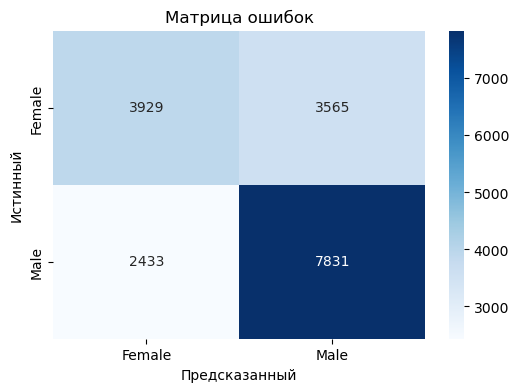

In [53]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Female','Male'], yticklabels=['Female','Male'])
plt.title("Матрица ошибок")
plt.xlabel("Предсказанный")
plt.ylabel("Истинный")
plt.show()

In [40]:
print(y.value_counts(normalize=True))

gender
1.0    0.573401
0.0    0.426599
Name: proportion, dtype: float64


In [41]:
train_ids = train_data.loc[X_train.index, 'id']
test_ids = train_data.loc[X_test.index, 'id']

intersection = set(train_ids).intersection(set(test_ids))
print(f"Количество пересечений id в train и test: {len(intersection)}")

Количество пересечений id в train и test: 0


In [42]:
print(f"Количество дубликатов в данных: {train_data.duplicated().sum()}")

Количество дубликатов в данных: 0


In [46]:
df_new = df_model.copy()
X_new = df_new.drop(columns=['id', 'gender'])

predictions = pipeline.predict(X_new)

df_new['predicted_gender'] = predictions
print(df_new[['id', 'predicted_gender']].head())

   id  predicted_gender
0   0               0.0
1   4               0.0
2   6               1.0
3   7               0.0
4   9               0.0


In [47]:
print(df_new['predicted_gender'].value_counts())

predicted_gender
1.0    61995
0.0    42442
Name: count, dtype: int64


In [48]:
df_new.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,6632.333333,19897,3,0.333333,0.0
1,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,4441.857143,31093,7,0.000000,0.0
2,6,1.0,52,среднее,1188,32,8.150379,0.075200,0.836140,0.4304,5605.666667,84085,15,0.400000,1.0
3,7,0.0,37,среднее,1198,32,5.188231,-0.000134,0.944113,0.5072,4525.153846,58827,13,0.384615,0.0
4,9,0.0,48,среднее,1134,32,5.334059,-0.366793,1.223406,0.5072,6329.000000,63290,10,0.900000,0.0


In [49]:
df_new['gender_filled'] = df_new['gender'] 
df_new.loc[df_new['gender_filled'].isna(), 'gender_filled'] = df_new.loc[df_new['gender_filled'].isna(), 'predicted_gender']

print(df_new[['gender', 'predicted_gender', 'gender_filled']].head(10))

   gender  predicted_gender  gender_filled
0     0.0               0.0            0.0
1     0.0               0.0            0.0
2     1.0               1.0            1.0
3     0.0               0.0            0.0
4     0.0               0.0            0.0
5     0.0               0.0            0.0
6     1.0               1.0            1.0
7     0.0               0.0            0.0
8     0.0               0.0            0.0
9     1.0               1.0            1.0


In [50]:
df_new.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,6632.333333,19897,3,0.333333,0.0,0.0
1,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,4441.857143,31093,7,0.000000,0.0,0.0
2,6,1.0,52,среднее,1188,32,8.150379,0.075200,0.836140,0.4304,5605.666667,84085,15,0.400000,1.0,1.0
3,7,0.0,37,среднее,1198,32,5.188231,-0.000134,0.944113,0.5072,4525.153846,58827,13,0.384615,0.0,0.0
4,9,0.0,48,среднее,1134,32,5.334059,-0.366793,1.223406,0.5072,6329.000000,63290,10,0.900000,0.0,0.0


### A/B-тестирование

In [54]:
from scipy import stats

In [55]:
with open(r"C:\Users\HAFF\Downloads\data\result_data\ids_first_company_positive.txt", "r", encoding="utf-8") as f:
    content = f.read()

content = content.replace("Ids of positive AB people ", "")
ids_list = content.strip().split(",")

ids_list = [int(i) for i in ids_list if i.strip().isdigit()]

test_ids = pd.DataFrame(ids_list, columns=["client_id"])
test_ids.head()

,client_id
0,88128
1,171960
2,142117
3,114589
4,146123


In [56]:
with open(r"C:\Users\HAFF\Downloads\data\result_data\ids_first_company_negative.txt", "r", encoding="utf-8") as f:
    conten = f.read()

conten = conten.replace("Ids of negative AB people ", "")
id_list = conten.strip().split(";")

id_list = [int(i) for i in id_list if i.strip().isdigit()]

control_ids = pd.DataFrame(id_list, columns=["client_id"])
control_ids.head()

,client_id
0,82450
1,63400
2,7138
3,102118
4,153511


In [57]:
df_new["group"] = np.where(df_new["id"].isin(test_ids["client_id"]), "test",
                           np.where(df_new["id"].isin(control_ids["client_id"]), "control", np.nan))

In [58]:
df_new.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,6632.333333,19897,3,0.333333,0.0,0.0,nan
1,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,4441.857143,31093,7,0.000000,0.0,0.0,nan
2,6,1.0,52,среднее,1188,32,8.150379,0.075200,0.836140,0.4304,5605.666667,84085,15,0.400000,1.0,1.0,nan
3,7,0.0,37,среднее,1198,32,5.188231,-0.000134,0.944113,0.5072,4525.153846,58827,13,0.384615,0.0,0.0,nan
4,9,0.0,48,среднее,1134,32,5.334059,-0.366793,1.223406,0.5072,6329.000000,63290,10,0.900000,0.0,0.0,nan


In [59]:
print(df_new['group'].value_counts())

group
nan        102531
test          992
control       914
Name: count, dtype: int64


In [60]:
df_ab = df_new[df_new['group'].isin(['test', 'control'])]
print(df_ab['group'].value_counts())

group
test       992
control    914
Name: count, dtype: int64


In [61]:
df_ab.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group
47,92,0.0,48,среднее,1190,32,5.732036,-0.216748,1.020912,0.5072,2673.615385,69514,26,0.500000,0.0,0.0,test
64,122,1.0,55,среднее,1188,32,8.376008,0.459318,0.488588,0.4304,4321.222222,38891,9,0.555556,1.0,1.0,test
98,205,0.0,39,среднее,1134,32,4.686262,0.280948,1.448960,0.5072,4399.000000,17596,4,0.500000,0.0,0.0,control
168,351,1.0,26,высшее,1175,32,7.160512,-0.228847,0.633794,0.4688,3572.333333,10717,3,0.333333,1.0,1.0,control
194,401,1.0,35,среднее,1188,32,7.766232,0.085714,1.410722,0.4304,15015.666667,90094,6,0.000000,1.0,1.0,control


In [62]:
#Конверсия (доля пользователей с покупками)
cr = df_ab.groupby('group')['purchases_count'].apply(lambda x: (x>0).mean())

#Средний чек (среднее значение cost_mean)
aov = df_ab.groupby('group')['cost_mean'].mean()

#Средний доход на пользователя
arpu = df_ab.groupby('group')['cost_sum'].mean()

In [63]:
print("Конверсия:\n", cr)
print("\nСредний чек:\n", aov)
print("\nARPU:\n", arpu)

Конверсия:
 group
control    1.0
test       1.0
Name: purchases_count, dtype: float64

Средний чек:
 group
control    6011.553524
test       5446.618035
Name: cost_mean, dtype: float64

ARPU:
 group
control    62498.179431
test       62892.592742
Name: cost_sum, dtype: float64


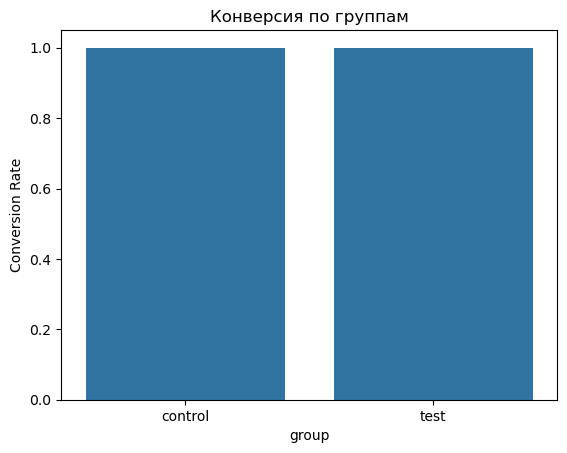

In [64]:
# Конверсия
cr_plot = df_ab.groupby('group')['purchases_count'].apply(lambda x: (x>0).mean()).reset_index()
sns.barplot(data=cr_plot, x='group', y='purchases_count')
plt.title("Конверсия по группам")
plt.ylabel("Conversion Rate")
plt.show()

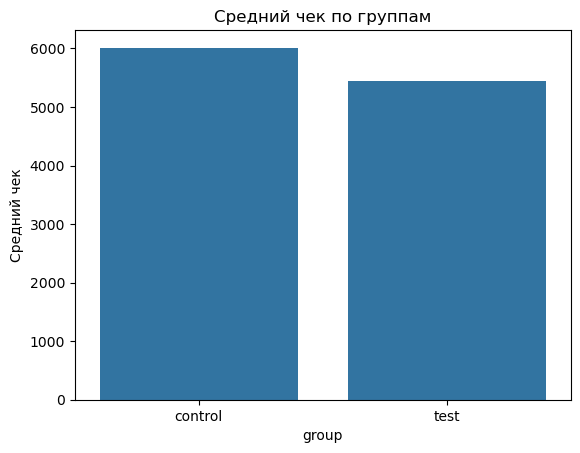

In [65]:
# Средний чек
aov_plot = df_ab.groupby('group')['cost_mean'].mean().reset_index()
sns.barplot(data=aov_plot, x='group', y='cost_mean')
plt.title("Средний чек по группам")
plt.ylabel("Средний чек")
plt.show()

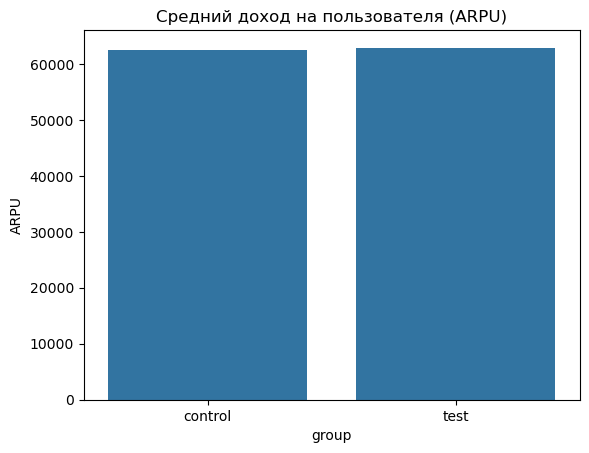

In [66]:
# ARPU
arpu_plot = df_ab.groupby('group')['cost_sum'].mean().reset_index()
sns.barplot(data=arpu_plot, x='group', y='cost_sum')
plt.title("Средний доход на пользователя (ARPU)")
plt.ylabel("ARPU")
plt.show()

#### Конверсия: Все пользователи совершили хотя бы одну покупку, значит кампания не увеличила конверсию, потому что она и так была максимальной (100%).
#### Средний чек (cost_mean): В тестовой группе средний чек чуть ниже.
#### ARPU (cost_sum): Средний доход на пользователя почти одинаковый.

In [67]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [68]:
# T-тест для ARPU (cost_sum)
group_test = df_ab[df_ab['group']=='test']['cost_sum']
group_control = df_ab[df_ab['group']=='control']['cost_sum']

t_stat, t_p = ttest_ind(group_test, group_control, equal_var=False)
print("T-test ARPU: t =", t_stat, ", p =", t_p)

T-test ARPU: t = 0.07671374112644623 , p = 0.9388602500651448


#### p > 0.05, значит различия по доходу статистически незначимы.

In [69]:
successes = df_ab.groupby('group')['purchases_count'].apply(lambda x: (x>0).sum())
nobs = df_ab.groupby('group')['purchases_count'].count()
print("Успехи:\n", successes)
print("Количество пользователей:\n", nobs)

Успехи:
 group
control    914
test       992
Name: purchases_count, dtype: int64
Количество пользователей:
 group
control    914
test       992
Name: purchases_count, dtype: int64


#### Персональная рассылка с 5 000 скидками для пользователей не показала заметного эффекта: конверсия в обеих группах равна 100%, а средний чек и доход на пользователя практически не отличаются между тестовой и контрольной группой. Рекомендую не тратить ресурсы на повторение такой рассылки в том же формате, а сосредоточиться на более целевых механиках: давать скидки пользователям, которые ещё не делают покупки регулярно, или использовать другие стимулирующие акции, которые реально могут увеличить продажи и доход(например, бонусы за повторные покупки, персональные рекомендации, временные акции).

#### По результатам A/B-тестирования можно заключить, что проведённая кампания не оказала значимого влияния на конверсию и средний доход на пользователя. Единственное заметное изменение — небольшое снижение среднего чека в тестовой группе, которое, однако, не привело к падению общей выручки. С точки зрения бизнеса, тест не показал убедительных оснований для масштабирования данной кампании в текущем виде.

### Кластеризация

In [70]:
df_new.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,6632.333333,19897,3,0.333333,0.0,0.0,nan
1,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,4441.857143,31093,7,0.000000,0.0,0.0,nan
2,6,1.0,52,среднее,1188,32,8.150379,0.075200,0.836140,0.4304,5605.666667,84085,15,0.400000,1.0,1.0,nan
3,7,0.0,37,среднее,1198,32,5.188231,-0.000134,0.944113,0.5072,4525.153846,58827,13,0.384615,0.0,0.0,nan
4,9,0.0,48,среднее,1134,32,5.334059,-0.366793,1.223406,0.5072,6329.000000,63290,10,0.900000,0.0,0.0,nan


In [71]:
df_new.shape

(104437, 17)

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [73]:
df_sample = df_purchases.merge(df_new, on='id', how='left'   )

df_sample.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender,age,education,...,ac_coef,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group
0,0,"велосипед горный женский stern mira 2.0 26""",белый,13599,0.0,1,7,0.0,36.0,среднее,...,-0.307147,0.959027,0.5072,6632.333333,19897.0,3.0,0.333333,0.0,0.0,nan
1,0,стол outventure,зелёный,1499,unknown,0,37,0.0,36.0,среднее,...,-0.307147,0.959027,0.5072,6632.333333,19897.0,3.0,0.333333,0.0,0.0,nan
2,0,набор outventure: стол + 4 стула,бежевый,4799,unknown,0,37,0.0,36.0,среднее,...,-0.307147,0.959027,0.5072,6632.333333,19897.0,3.0,0.333333,0.0,0.0,nan
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,NaN,31.0,среднее,...,-0.030225,0.794720,0.4304,3649.000000,14596.0,4.0,0.250000,1.0,1.0,nan
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,unknown,0,27,NaN,31.0,среднее,...,-0.030225,0.794720,0.4304,3649.000000,14596.0,4.0,0.250000,1.0,1.0,nan


In [74]:
df_sample.shape

(786260, 23)

In [75]:
df_s = df_sample.sample(100000, random_state=42)

In [76]:
num_features = ['age', 'gender_filled', 'lbt_coef', 'ac_coef', 'sm_coef', 'personal_coef', 'cost_mean', 'cost_sum', 'purchases_count', 'sale_ratio']
cat_features = ['education', 'city']

In [77]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)])

In [78]:
from sklearn.metrics import silhouette_score

In [84]:
X = df_s[num_features + cat_features]

X = X.replace([np.inf, -np.inf], np.nan)
for col in num_features:
    X[col] = X[col].fillna(X[col].median())
for col in cat_features:
    X[col] = X[col].fillna(X[col].mode()[0])

X_transformed = preprocessor.fit_transform(X)

inertia = []
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_transformed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_transformed, labels))

Text(0, 0.5, 'Инерция')

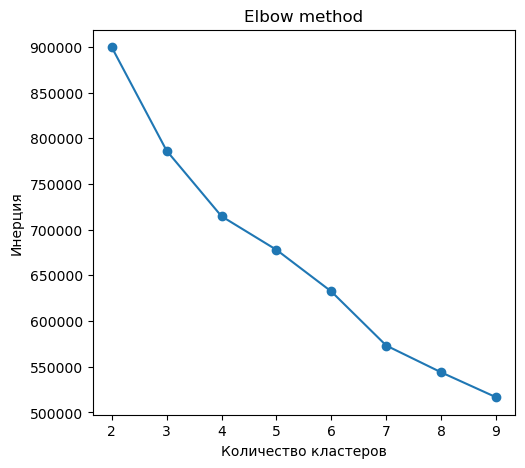

In [85]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,10), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

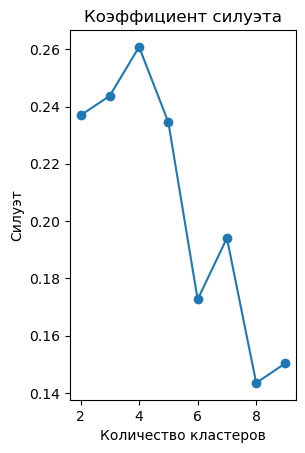

In [86]:
plt.subplot(1,2,2)
plt.plot(range(2,10), silhouette, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.show()

In [87]:
df_s = df_s.replace([np.inf, -np.inf], np.nan)

for col in num_features:
    df_s[col] = df_s[col].fillna(df_s[col].mean())
for col in cat_features:
    df_s[col] = df_s[col].fillna(df_s[col].mode()[0])

In [88]:
print(df_s[num_features].isna().sum())
print(df_s[cat_features].isna().sum())

age                0
gender_filled      0
lbt_coef           0
ac_coef            0
sm_coef            0
personal_coef      0
cost_mean          0
cost_sum           0
purchases_count    0
sale_ratio         0
dtype: int64
education    0
city         0
dtype: int64


In [89]:
X = preprocessor.fit_transform(df_s)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
df_s['cluster'] = labels

In [90]:
cluster_summary = df_s.groupby('cluster')[num_features].mean()
cluster_sizes = df_s['cluster'].value_counts()

print(cluster_summary)
print(cluster_sizes)

               age  gender_filled  lbt_coef   ac_coef   sm_coef  \
cluster                                                           
0        37.645614       0.596491  6.695045  0.199628  0.952292   
1        40.526743       0.047765  5.182854  0.038222  1.013614   
2        36.920656       0.951711  7.468334  0.039798  0.924427   

         personal_coef     cost_mean      cost_sum  purchases_count  \
cluster                                                               
0             0.472393  10359.716973  2.623819e+06       290.480702   
1             0.508133   3987.352076  6.783878e+04        17.544928   
2             0.425002   6440.651649  1.002223e+05        17.140350   

         sale_ratio  
cluster              
0          0.244715  
1          0.417473  
2          0.312057  
cluster
2    56143
1    43002
0      855
Name: count, dtype: int64


In [91]:
df_s.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender,age,education,...,sm_coef,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group,cluster
619168,139957,рашгард женский bona fide rashguard extra sex ...,черный,4550,0.0,0,2,0.0,39.0,среднее,...,1.273314,0.5072,7379.400000,36897.0,5.0,0.000000,1.0,0.0,nan,1
34904,7822,рубашка с коротким рукавом женская outventure,белый,1399,0.0,1,51,0.0,32.0,среднее,...,0.861657,0.5072,3852.846154,50087.0,13.0,0.461538,0.0,0.0,nan,1
100009,22270,брюки женские reebok dreamblend cotton,черный,5179,0.0,1,20,0.0,42.0,высшее,...,1.165958,0.5584,4111.000000,20555.0,5.0,1.000000,0.0,0.0,nan,1
705772,159747,джемпер флисовый женский outventure,фисташковый,3199,0.0,1,1,0.0,35.0,среднее,...,0.751589,0.5072,2261.033333,67831.0,30.0,0.700000,0.0,0.0,nan,1
680383,153775,полуботинки мужские columbia vent aero,черный,6079,1.0,1,48,1.0,39.0,среднее,...,0.514194,0.4304,4654.000000,27924.0,6.0,0.500000,1.0,1.0,nan,2


In [92]:
cluster_products = df_s.groupby(['cluster', 'product']).agg(
    total_quantity=('base_sale', 'sum'),
    total_revenue=('cost', lambda x: (x * df_s.loc[x.index, 'base_sale']).sum())).reset_index()

top_products = cluster_products.groupby('cluster').apply(lambda x: x.nlargest(5, 'total_quantity')).reset_index(drop=True)
print(top_products)

    cluster                                            product  \
0         0                палатка 2-местная outventure dome 2   
1         0           матрас надувной intex роял 203х183х25 см   
2         0  роликовые коньки детские раздвижные reaction r...   
3         0        велосипед горный stern energy 1.0 26", 2022   
4         0      велосипед горный stern motion 1.0 27,5", 2022   
5         1                             футболка женская demix   
6         1                                 брюки женские fila   
7         1                                   лиф женский joss   
8         1                              легинсы женские demix   
9         1                             купальник женский fila   
10        2                                шорты мужские demix   
11        2                                 брюки мужские fila   
12        2                                брюки мужские demix   
13        2                             футболка мужская demix   
14        

C:\Users\HAFF\AppData\Local\Temp\ipykernel_18780\1049865918.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = cluster_products.groupby('cluster').apply(lambda x: x.nlargest(5, 'total_quantity')).reset_index(drop=True)


In [93]:
discount_effect = df_s.groupby('cluster').agg(total_purchases=('base_sale', 'count'),       
    discounted_purchases=('base_sale', 'sum'))

# Доля покупок со скидкой
discount_effect['discount_ratio'] = discount_effect['discounted_purchases'] / discount_effect['total_purchases']
print(discount_effect)

         total_purchases  discounted_purchases  discount_ratio
cluster                                                       
0                    855                   201        0.235088
1                  43002                 18113        0.421213
2                  56143                 17553        0.312648


C:\Users\HAFF\AppData\Local\Temp\ipykernel_18780\3597938892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_s, x='cluster', hue=None, palette='viridis', legend=False)


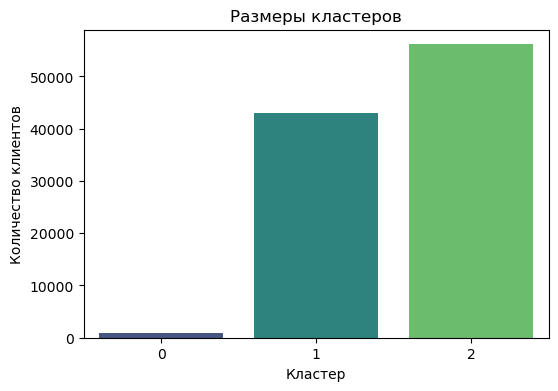

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_s, x='cluster', hue=None, palette='viridis', legend=False)
plt.title("Размеры кластеров")
plt.xlabel("Кластер")
plt.ylabel("Количество клиентов")
plt.show()

C:\Users\HAFF\AppData\Local\Temp\ipykernel_18780\2414636915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_s, x='cluster', y='cost_mean', palette='magma')


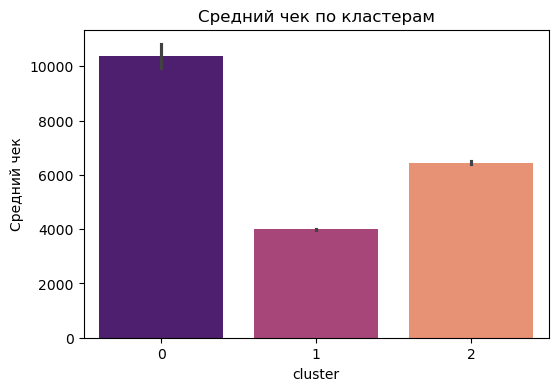

In [96]:
# Средний чек по кластерам
plt.figure(figsize=(6,4))
sns.barplot(data=df_s, x='cluster', y='cost_mean', palette='magma')
plt.title("Средний чек по кластерам")
plt.ylabel("Средний чек")
plt.show()

C:\Users\HAFF\AppData\Local\Temp\ipykernel_18780\4271017654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_s, x='cluster', y='cost_sum', palette='plasma')


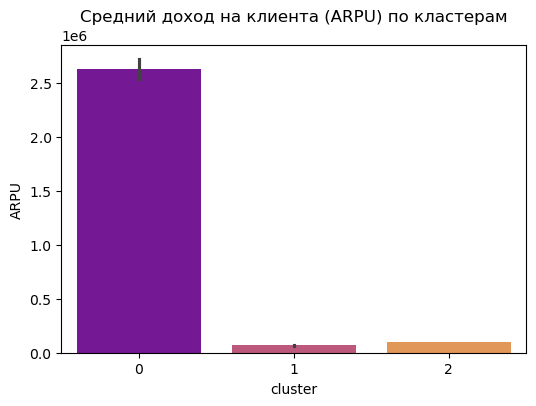

In [97]:
# ARPU (суммарные траты на клиента)
plt.figure(figsize=(6,4))
sns.barplot(data=df_s, x='cluster', y='cost_sum', palette='plasma')
plt.title("Средний доход на клиента (ARPU) по кластерам")
plt.ylabel("ARPU")
plt.show()

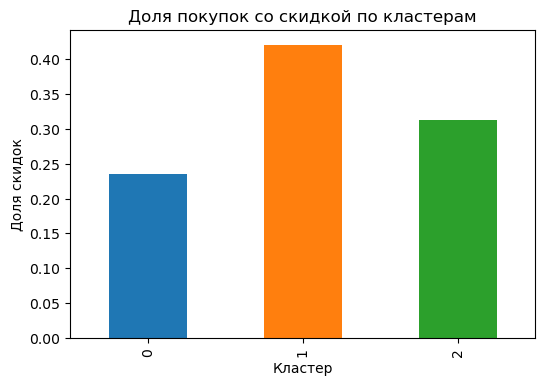

In [100]:
# Доля покупок со скидкой
plt.figure(figsize=(6,4))
discount_effect['discount_ratio'].plot(kind='bar', color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title("Доля покупок со скидкой по кластерам")
plt.ylabel("Доля скидок")
plt.xlabel("Кластер")
plt.show()

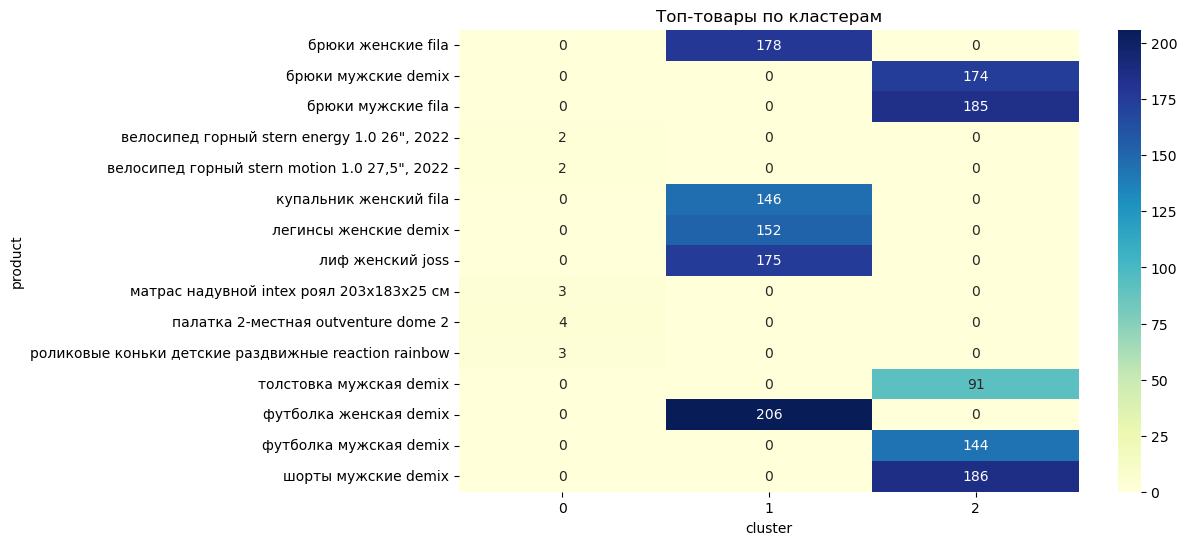

In [101]:
# Топ-товары по кластерам 
top_products_pivot = top_products.pivot(index='product', columns='cluster', values='total_quantity').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(top_products_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Топ-товары по кластерам")
plt.show()

#### Общий вывод:
#### •	Кластер 0 включает наименьшее количество клиентов (855 человек), которые демонстрируют высокую покупательскую активность, самый высокий средний чек и низкую долю покупок со скидкой (23%). Эти клиенты относятся к категории «премиум» — они склонны к приобретению дорогих товаров (палатки, велосипеды, роликовые коньки) и менее чувствительны к скидкам.
#### •	Кластер 1 насчитывает около 43 тысяч клиентов. Средний чек здесь является самым низким (~4 тыс.), зато доля покупок со скидкой достигает 42%, что указывает на высокую чувствительность к акциям. Основные покупки связаны с повседневной и женской одеждой (футболки, брюки, легинсы, купальники).
#### •	Кластер 2 является крупнейшим (около 56 тысяч клиентов) и занимает промежуточную позицию по среднему чеку между кластерами 0 и 1. Доля покупок со скидкой составляет 31%, а ассортимент преимущественно включает мужскую одежду (шорты, футболки, толстовки).
#### Влияние скидок на покупательское поведение чётко различается между сегментами: премиальные клиенты (кластер 0) совершают покупки преимущественно без скидок, что делает маркетинговые акции для них менее актуальными, тогда как клиенты кластера 1 проявляют наибольшую ценовую чувствительность и являются ключевой целевой группой для стимулирования сбыта через скидочные предложения. Кластер 2 демонстрирует умеренную реакцию на скидки, и для него целесообразно тестировать сбалансированные маркетинговые подходы.

### Построения модели склонности клиента к покупке.

In [110]:
print(df_sample.head())
print(df_sample.shape)
print(df_sample.columns)

   id                                            product      colour   cost  \
0   0        велосипед горный женский stern mira 2.0 26"       белый  13599   
1   0                                    стол outventure     зелёный   1499   
2   0                   набор outventure: стол + 4 стула     бежевый   4799   
3   3                            бутсы мужские gsd astro       белый   1599   
4   3  мяч футбольный puma teamfinal 21.2 fifa qualit...  мультицвет   7199   

  product_sex  base_sale  dt  gender   age education  ...   ac_coef   sm_coef  \
0         0.0          1   7     0.0  36.0   среднее  ... -0.307147  0.959027   
1     unknown          0  37     0.0  36.0   среднее  ... -0.307147  0.959027   
2     unknown          0  37     0.0  36.0   среднее  ... -0.307147  0.959027   
3         1.0          0  13     NaN  31.0   среднее  ... -0.030225  0.794720   
4     unknown          0  27     NaN  31.0   среднее  ... -0.030225  0.794720   

   personal_coef    cost_mean  cost_su

In [113]:
df_sample_cleaned = df_sample.dropna()
df_sample_cleaned = df_sample_cleaned.reset_index(drop=True)  

print(f"Количество строк до удаления: {len(df_sample)}")
print(f"Количество строк после удаления: {len(df_sample_cleaned)}")

Количество строк до удаления: 786260
Количество строк после удаления: 664665


In [114]:
df = df_sample_cleaned.copy()

In [117]:
df_target = df[(df['country'] == 32) & (df['city'] == 1188)].copy()

In [118]:
df_target['purchase'] = (df_target['base_sale'] > 0).astype(int)

In [123]:
numerical_features = ['age','purchases_count','cost_mean','cost_sum',
                      'sale_ratio','lbt_coef','ac_coef','sm_coef','personal_coef','gender_filled']

categorical_features = ['education','product_sex','colour']

for col in categorical_features:
    df_target[col] = df_target[col].astype(str)

In [124]:
X = df_target[numerical_features + categorical_features]
y = df_target['purchase']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [127]:
m = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])

m.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'purchases_count',
                                                   'cost_mean', 'cost_sum',
                                                   'sale_ratio', 'lbt_coef',
                                                   'ac_coef', 'sm_coef',
                                                   'personal_coef',
                                                   'gender_filled']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['education', 'product_sex',
                                                   'colour'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [128]:
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:,1]

In [130]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9613
           1       0.67      0.63      0.65      5487

    accuracy                           0.75     15100
   macro avg       0.73      0.73      0.73     15100
weighted avg       0.75      0.75      0.75     15100

ROC-AUC: 0.8252323740493949


#### Значение 0.825 значит, что модель очень хорошо различает покупателей и непокупателей, независимо от выбранного порога.

In [131]:
df_target['purchase_probability'] = m.predict_proba(X)[:,1]

In [132]:
df_target

,id,product,colour,cost,product_sex,base_sale,dt,gender,age,education,...,personal_coef,cost_mean,cost_sum,purchases_count,sale_ratio,predicted_gender,gender_filled,group,purchase,purchase_probability
10,6,кроссовки для мальчиков geox j sprintye boy,лимонный,4999,unknown,0,1,1.0,52.0,среднее,...,0.4304,5605.666667,84085.0,15.0,0.4,1.0,1.0,nan,0,0.165000
11,6,кеды мужские reebok royal complete cln2,черный,4799,1.0,1,3,1.0,52.0,среднее,...,0.4304,5605.666667,84085.0,15.0,0.4,1.0,1.0,nan,1,0.448323
12,6,футболка мужская kappa authentic core,темно-синий,999,1.0,0,8,1.0,52.0,среднее,...,0.4304,5605.666667,84085.0,15.0,0.4,1.0,1.0,nan,0,0.215952
13,6,бейсболка детская nike futura mash up,синий,1119,unknown,1,11,1.0,52.0,среднее,...,0.4304,5605.666667,84085.0,15.0,0.4,1.0,1.0,nan,1,0.735750
14,6,"носки детские demix, 2 пары",синий,299,unknown,0,11,1.0,52.0,среднее,...,0.4304,5605.666667,84085.0,15.0,0.4,1.0,1.0,nan,0,0.735750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664660,178004,полуботинки мужские ascot vortex,хаки,7999,1.0,0,12,1.0,52.0,высшее,...,0.4688,11663.125000,93305.0,8.0,0.0,1.0,1.0,nan,0,0.135000
664661,178004,кроссовки мужские nike air max 90,черный,24299,1.0,0,13,1.0,52.0,высшее,...,0.4688,11663.125000,93305.0,8.0,0.0,1.0,1.0,nan,0,0.041667
664662,178004,кроссовки мужские nike air max 90,черный,24299,1.0,0,20,1.0,52.0,высшее,...,0.4688,11663.125000,93305.0,8.0,0.0,1.0,1.0,nan,0,0.041667
664663,178004,пакет,коричневый,12,unknown,0,20,1.0,52.0,высшее,...,0.4688,11663.125000,93305.0,8.0,0.0,1.0,1.0,nan,0,0.025000


#### Модель RandomForest показывает высокую точность и ROC-AUC ~ 0.825, что говорит о том, что она хорошо различает клиентов, которые совершат покупку, и тех, кто не совершит.
#### Для каждого клиента рассчитана вероятность совершения покупки (purchase_probability). Это позволяет ранжировать клиентов по склонности к покупке и использовать эту информацию для маркетинговой кампании.
#### Можно выделять клиентов с высокой вероятностью покупки для специальных предложений, скидок или персонализированной рекламы. Также модель может использоваться для анализа факторов, которые влияют на вероятность покупки (через feature importance), например: age, cost_mean, purchases_count и др.